Matplotlib is the most popular plotting library for Python. It gives you control over every aspect of a figure. It was designed to have a similar feel to MatLab's graphical plotting. It also works well with Numpy and Pandas. 

If you go to: https://matplotlib.org/gallery.html then you can go to any type of chart you want and see example code that is commented on how to remake it. 

# Matplotlib Fundamentals

In [1]:
import matplotlib.pyplot as plt

In [2]:
# This code can only be used in the jupyter notebook. If you are elsewhere, you would type plt.show() after the plto is created.
# What this does is that it allows you to see your plots
%matplotlib inline

In [3]:
import numpy as np
x = np.linspace(0,5,11)
y = x**2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

There are two ways to create plots. The functional way and the object oriented way. First we show the functional way:
1. plt.show(args, kwargs) => Will add to the plot what elements you pass. For now we pass in the x and y values. 

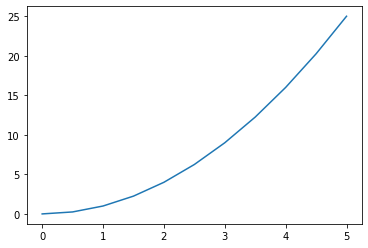

In [6]:
plt.plot(x,y)
# Here is a place where if we weren't in the Jupyter Notebook we would have used plt.show() to see the plot

You can also specify color by adding in another argument. (It works very similar to MatLab)

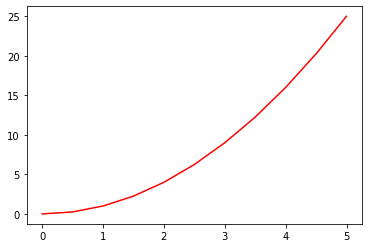

In [7]:
plt.plot(x,y,'r-')

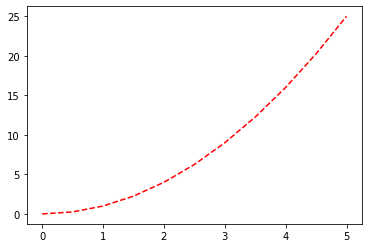

In [8]:
plt.plot(x,y,'r--')

To label axis and title the graph you can use:
1. plt.xlabel(label,...) => Will label the x-axis with your String label that you pass in
2. plt.ylabel(label,...) => Will do same but with y-axis
3. plt.title(title,...) => Will do the same but with the title

Text(0.5, 1.0, 'Title')

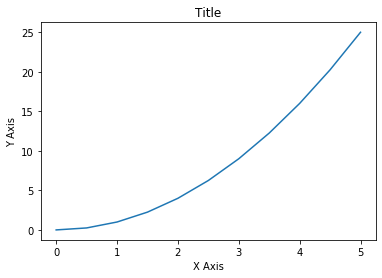

In [9]:
plt.plot(x,y)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Title")

Now we will create multiplots on the same canvas. You will use:
1. plt.subplot(args, kwargs) => This will create a subplot. As the first three arguments you must pass in the number of rows in the canvas then the number of columns and then the graph number you are refering to.

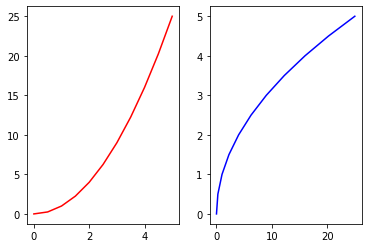

In [10]:
plt.subplot(1,2,1)
plt.plot(x,y,'r')

plt.subplot(1,2,2)
plt.plot(y,x,'b')

We will now look at the better way, using object oriented programing. The main idea is that you will create figure objects and then call mathods and use attributes off of those. First create a figure object:
1. plt.figure(...) => returns a figure object. Think of this as a blank canvas that you can now put stuff on like axis.

Then we will add axis to the figure so that we can graph using:
2. fig.add_axes([pleft,pbottom,pwidth,pheight],...) => It will add axes to the canvas in a specific location and specific shape using the values you pass in. Think of the canvas of having its own variables, self.width, self.height. To locate where to put the axes it will multiply pleft and self.width and set that as the x-coordinate. It will multiply pbottom and self.height and set that as the y-coordinate. Finally the origin will be placed at the bottom left of the canvas. In a similar manner, pwidth and self.width, and pheight and self.height, will be multiplied to find the width and height of the axes. To wrap your head around this, try to change the pleft and pbottom in the list used for axes2 to first line up the bottom left corners. Then try each of the other corners until you understand.

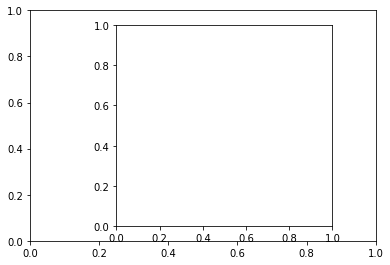

In [11]:
# Just a note, the reason the figure gets displayed is that the inline command at the top of the notebook 
# Sees the fig being declared and shows the fig that exists after all commands in the cell are run. 
# If you write fig in the next cell you will still see the same thing show up. Anywhere else you would use fig.show(). 

fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.3,0.15,0.5,0.7])

There are other things you can do as well. To actually plot something, just use:
3. axes.plot(x,y) => Will do plt.plot() but with the axes of the figure instead (make sure you store that as a variable!)

You can also label stuff similarly.
4. axes.set_xlabel(label, ...) => Will label axes with the string label
5. axes.set_ylabel(label, ...) => Please don't make me explain this too...
6. axes.set_title(title, ...) => Same as above

Text(0.5, 1.0, 'Set title')

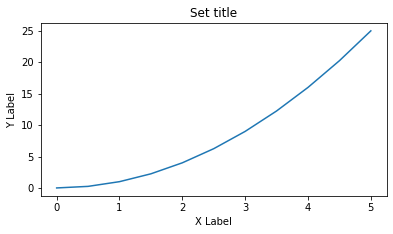

In [12]:
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.6])

axes1.plot(x,y)
axes1.set_xlabel('X Label')
axes1.set_ylabel('Y Label')
axes1.set_title("Set title")

Text(0.5, 1.0, 'AXES 2')

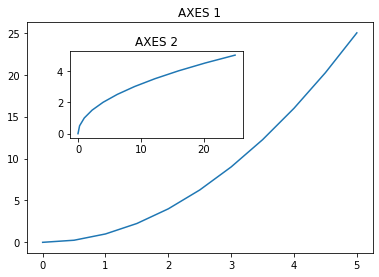

In [13]:
# One more example
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.4,0.3])

axes1.plot(x,y)
axes2.plot(y,x)

axes1.set_title('AXES 1')
axes2.set_title('AXES 2')

Now we look at how to create subplots in a managable way. You will use:
1. plt.subplots(nrows, ncols,...) => returns a tuple containing a figure object and a numpy array object which contains axes objects. Essentially, subplots creates the figure and axes objects for you, but also calculates the arguments for the axes objects that make them look well spaced. 

If you have too many plots at once (if they overlap that is a bad sign) you can just call:
2. plt.tight_layout(...) => will automatically adjust the subplot layers to give padding that is specified (defaults to 1.08)

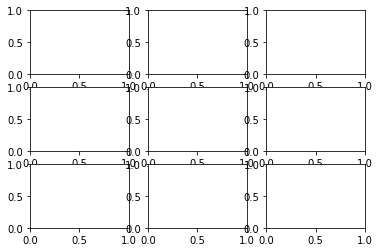

In [46]:
fig, axes_list = plt.subplots(3,3)

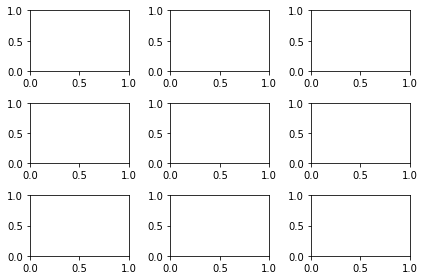

In [15]:
fig, axes_list = plt.subplots(3,3)
plt.tight_layout()

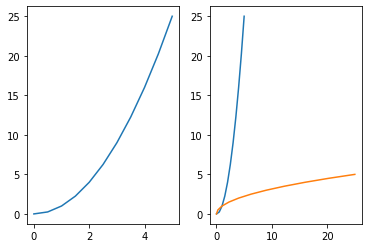

In [16]:
#You can iterate through all axes and do stuff!
fig, axes = plt.subplots(1,2)

for a in axes:
    a.plot(x,y)
    
#Indexing can also be done as a result. Remember, it is because numpy arrays are iterable
axes[1].plot(y,x)

Now we will start looking at Figure Size and DPI. Figure size is the size of the figure and DPI is the amount of dots per inch.
To control them you will add new arguments into your functions:
1. figsize = (l,w) => Specifies the length and width in inches of the canvas; Can be assigned a value in all functions that create figure objects (such as .figure() or .subplot())
2. dpi = n => Specifies the amount of dots per inch that should be shown (can think of it as resolution); Can be used in all functions that take in figsize along with others that deal with canvases such as .savefig()
    

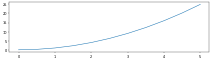

In [17]:
fig = plt.figure(figsize = (8,2), dpi = 25)
#You can see that dots per inch changes the scale of the figure down a lot due to lowering the inch to frame ratio

axis = fig.add_axes([0,0,1,1])
axis.plot(x,y)

If you want to save a plot that is possible as well. matplotlib can save to a number of different file formats as well. To save a figure you can use this:
1. fig.savefig('filename') => will save the figure to the filename you specify. If no extention is provided, it will default to a png file

In [18]:
fig.savefig('Example_save.jpeg', dpi = 200)

Now we look at how to create legends to label your graphs. First note how we can add more the one relation to a graph. To add a legend you will need to do two things.
For each of the equations that you want to label you will need to add a label argument when defining it. 
Then you will also need to call:
1. axis.legend(loc,...|) => Creates a legend in the canvas for all the plots with labels on them. The legend function can take in an argument which could be one of the following inputs: 0, 'best'; 1, 'upper right'; 2, 'upper left'; 3, 'lower left'; 4, 'lower right'; 5, 'right'; 6, 'center left'; 7, 'center right'; 8, 'lower center'; 9, 'upper center'; 10, 'center'. Where each of these pairs correspond to the same thing and are just different arguments you may pass in, or you could just type in a tuple containing the percent width and height you want the legend's left corner to be at.

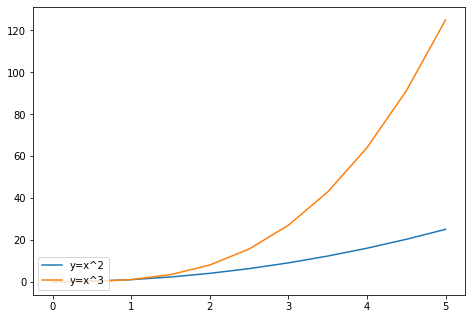

In [19]:
fig = plt.figure()

axes = fig.add_axes([0,0,1,1])
axes.plot(x, x**2, label = "y=x^2")
axes.plot(x, x**3, label = "y=x^3")

axes.legend(loc = 3)

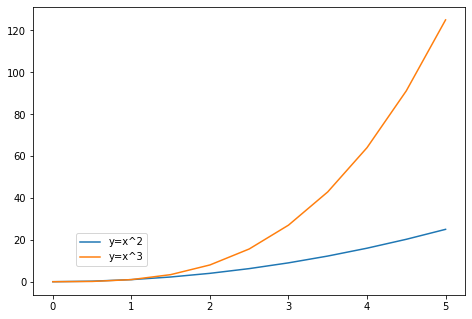

In [20]:
axes.legend(loc = (0.1,0.1))
fig

Now we look at how to style your graphs. To do this you just need to learn about a couple of new arguments:
1. color = "" => Adds the specified color to your graph. Can be used in methods that plot equations. When being used you can pass in basic color names like green or blue, and also pass in hex values.
2. linewidth = n => Defaults to 1 but width can be scaled by n from default by passing in n.
   - lw = n => Same thing but is shorter but less readable
3. alpha = x => Controls how transparent the line is. 
4. linestyle = "" => Decides the style of the line. Can be one of the following argument-meaning pairs: '-', solid line; '--', dashed line; '-.', dash then dot patterned line; ':', dotted line; 'None', No line; ' ', No line; '', No line; 'solid', solid line; 'dashed', dashed line; 'dashdot', dash then dot patterned line; 'dotted', dotted line.
   - ls = '' => Same thing but is shorter but less readable
5. drawstyle = "" => Decides what kind of connection exists between points. Can be one of the following argument-meaning pairs: 'default', curve; 'steps-mid', Starts a step at the average of the x-coordinates; 'steps-pre', Starts a step at the x-coordinate; 'steps-post', Starts a step at the next x-coordinate; 'steps', same as steps-pre
6. marker = "" => Marks all the points used to plot the graph with the thing specified. All possible arguments can be found here: https://matplotlib.org/3.1.1/api/markers_api.html
   - markersize = n => Decides the size of the markers
   - markerfacecolor = "" => Decides the color of the markers, argument must pass same criterion the color has
   - markeredgewidth = n => Decides the width of the markers
   - markeredgecolor = "" => Decides the color of the edge of the markers,

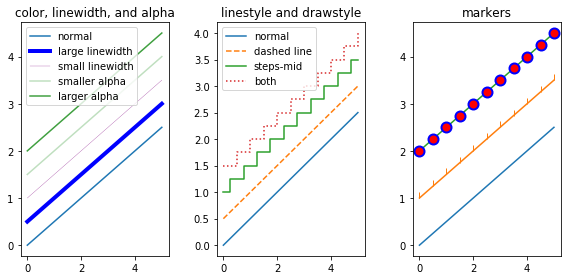

In [42]:
fig, axes = plt.subplots(1,3, figsize=(8,4))

axes[0].set_title("color, linewidth, and alpha")
axes[0].plot(x,1/2*x+0, label = "normal")
axes[0].plot(x,1/2*x+0.5, color = 'blue', linewidth = 4, label = "large linewidth")
axes[0].plot(x,1/2*x+1, color = '#800080', linewidth = 0.25, label = "small linewidth")
axes[0].plot(x,1/2*x+1.5, color = 'green', alpha = 0.25, label = "smaller alpha")
axes[0].plot(x,1/2*x+2, color = 'green', alpha = 0.75, label = "larger alpha")
axes[0].legend(loc = 0)

axes[1].set_title("linestyle and drawstyle")
axes[1].plot(x, 1/2*x+0, label = 'normal')
axes[1].plot(x, 1/2*x+0.5, label = 'dashed line', linestyle = '--')
axes[1].plot(x, 1/2*x+1, label = 'steps-mid', drawstyle='steps-mid')
axes[1].plot(x, 1/2*x+1.5, label = 'both', ls = ':', ds='steps-post')
axes[1].legend(loc = 0)

axes[2].set_title("markers")
axes[2].plot(x, 1/2*x+0)
axes[2].plot(x, 1/2*x+1, marker = 2)
axes[2].plot(x, 1/2*x+2, marker = "o", markersize = 10, markerfacecolor = 'red', markeredgewidth = 2, markeredgecolor='blue')

plt.tight_layout()

If you want to choose the range of x and y values to look at you can simply use the following methods:
1. (axis).set_xlim([],...) => Restricts the x range of the plot. Takes in a list containing the x lowerbound followed by the x upperbound
2. (axis).set_ylim([],...) => Restricts the y range of the plot. Takes in a list containing the y lowerbound followed by the y upperbound

You might notice that it looks less like a curve and more like points connected by a line. This is because we have less points defined in that interval so instead of looking like a curve which is actually just lots of points connected by lines, it looks like what it really is. So when graphing say a polynomial, make sure you define a good amount of points. To really illustrate that, a higher degreed polynomial is graphed in the next example. Even though both samples have the same number of points one clearly dominates the other

(0, 2)

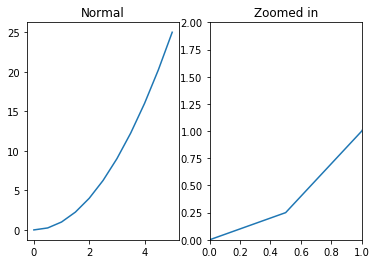

In [58]:
fig, axes = plt.subplots(1,2)

axes[0].set_title("Normal")
axes[0].plot(x, x**2)

axes[1].set_title("Zoomed in")
axes[1].plot(x, x**2)
axes[1].set_xlim([0,1])
axes[1].set_ylim([0,2])

(-1, 1)

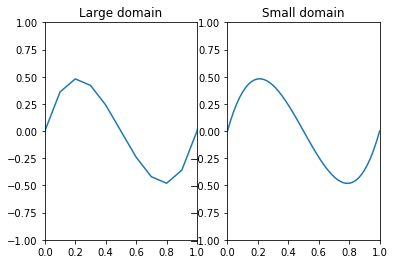

In [65]:
def p(x):
    return 10*x*(x-0.5)*(x-1)

small_domain = np.linspace(0,1,51)
large_domain = np.linspace(0,5,51)

fig, axes = plt.subplots(1,2)

axes[0].set_title("Large domain")
axes[0].plot(large_domain, p(large_domain))
axes[0].set_xlim([0,1])
axes[0].set_ylim([-1,1])

axes[1].set_title("Small domain")
axes[1].plot(small_domain, p(small_domain))
axes[1].set_xlim([0,1])
axes[1].set_ylim([-1,1])

More stuff can be found in the advanced matplotlib notebook. It will not be noted here as it is not crucial to know. That being said we now start the exercises